Ознайомлення з даними

In [24]:
import pandas as pd

# Завантажуємо дані
data = pd.read_csv('train.csv')

# Виводимо перші 10 рядків
print("Перші 10 рядків:")
print(data.head(10))

# Отримуємо базову статистику
print("\nБазова статистика:")
print(data.describe())

# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())

Перші 10 рядків:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timo

Попередня обробка даних

In [25]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('train.csv')

# Заповнення пропущених значень
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Заповнюємо середнім значенням
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заповнюємо модою

# One-Hot Encoding для змінних Sex та Embarked
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Додавання нової ознаки FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch']

# Виведення перших кількох рядків для перевірки
print(data.head(10))

# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name        Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.000000      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1      0   
2                             Heikkinen, Miss. Laina  26.000000      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1      0   
4                           Allen, Mr. William Henry  35.000000      0      0   
5                                   Moran, Mr. James  29.699118      0      0   
6                            McCarth

Поділ даних на тренувальну та тестову вибірки

In [26]:
from sklearn.model_selection import train_test_split

# Розділення на ознаки (X) та цільову змінну (y)
X = data.drop(columns=['Survived'])  # Назву нашої цільової змінної
y = data['Survived']  # Назву нашої цільової змінної

# Поділ на тренувальну (80%) та тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення розмірів вибірок для перевірки
print("Розмір тренувальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)


Розмір тренувальної вибірки: (712, 13)
Розмір тестової вибірки: (179, 13)


Побудова моделей

Logistic Regression метрики:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639


Decision Tree метрики:
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347


Random Forest метрики:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746


Підсумкові результати для всіх моделей:
Logistic Regression: {'Accuracy': 0.8100558659217877, 'Precision': np.float64(0.7857142857142857), 'Recall': np.float64(0.7432432432432432), 'F1 Score': np.float64(0.7638888888888888)}
Decision Tree: {'Accuracy': 0.7821229050279329, 'Precision': np.float64(0.7397260273972602), 'Recall': np.float64(0.7297297297297297), 'F1 Score': np.float64(0.7346938775510204)}
Random Forest: {'Accuracy': 0.8212290502793296, 'Precision': np.float64(0.8088235294117647), 'Recall': np.float64(0.7432432432432432), 'F1 Score': np.float64(0.7746478873239436)}


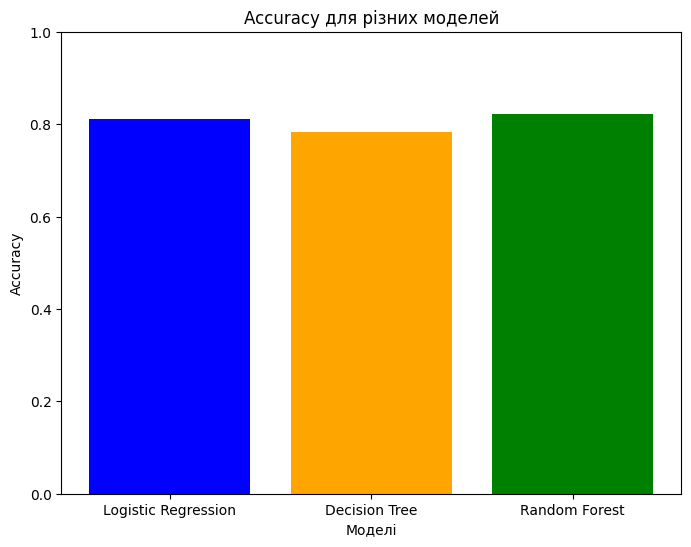

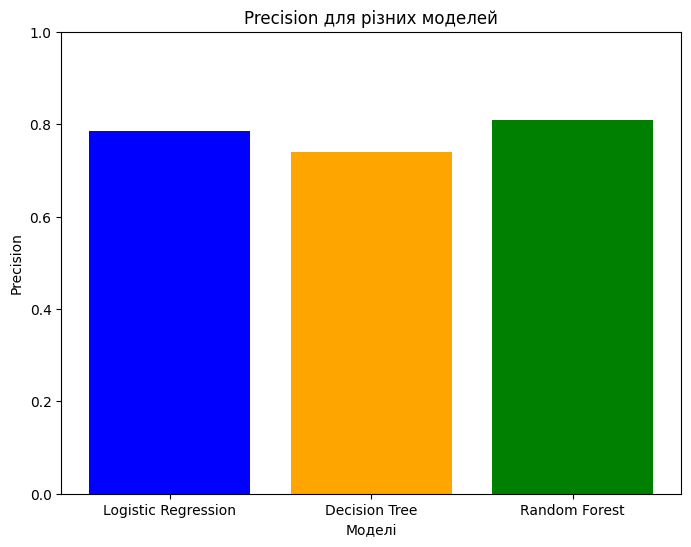

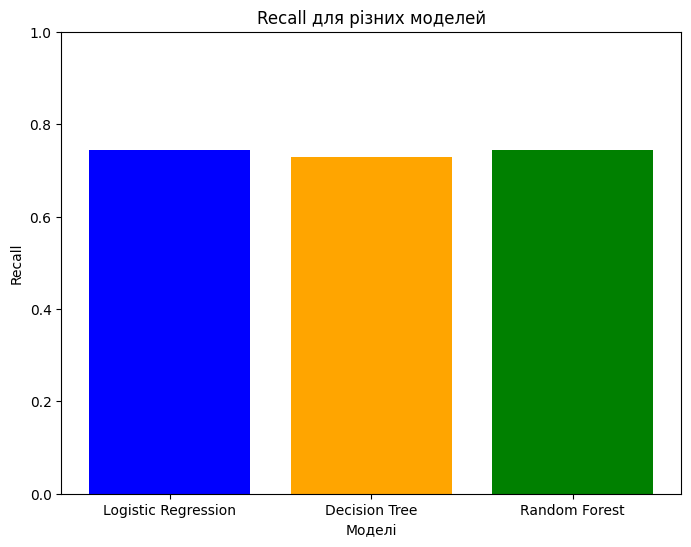

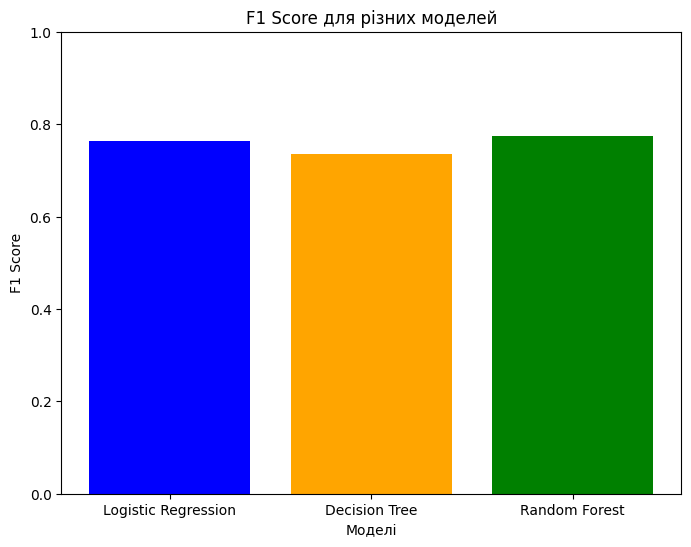

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Завантаження даних 
data = pd.read_csv('train.csv')

# Попередні кроки для підготовки даних
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data['FamilySize'] = data['SibSp'] + data['Parch']

# Вибір цільової змінної та ознак 
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # Видаляємо непотрібні стовпці
y = data['Survived']

# Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словник для збереження результатів
results = {}

# Функція для тренування, передбачення та оцінки моделі
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)  # Тренування моделі
    y_pred = model.predict(X_test)  # Передбачення на тестовій вибірці
    
    # Оцінка метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Збереження результатів
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    print(f"{model_name} метрики:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, 'Logistic Regression')

# Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
evaluate_model(tree, 'Decision Tree')

# Випадковий ліс
forest = RandomForestClassifier(random_state=42)
evaluate_model(forest, 'Random Forest')

# Підсумкові результати для всіх моделей
print("Підсумкові результати для всіх моделей:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

# Візуалізація метрик
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())

# Створення графіків для кожної метрики
for metric in metrics_names:
    plt.figure(figsize=(8, 6))
    metric_values = [results[model][metric] for model in model_names]
    
    plt.bar(model_names, metric_values, color=['blue', 'orange', 'green'])
    plt.xlabel('Моделі')
    plt.ylabel(metric)
    plt.title(f'{metric} для різних моделей')
    plt.ylim(0, 1)  # Обмежуємо шкалу від 0 до 1 для всіх метрик
    plt.show()

Оцінка результатів

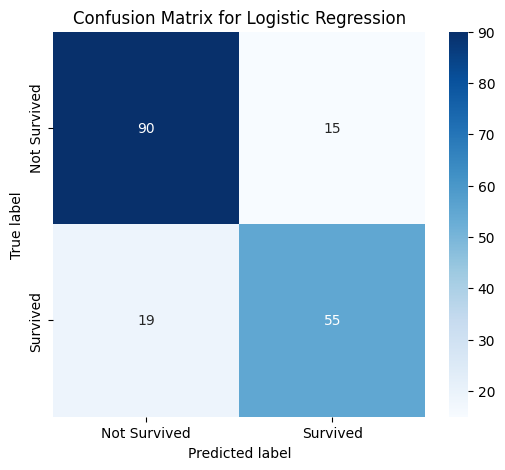

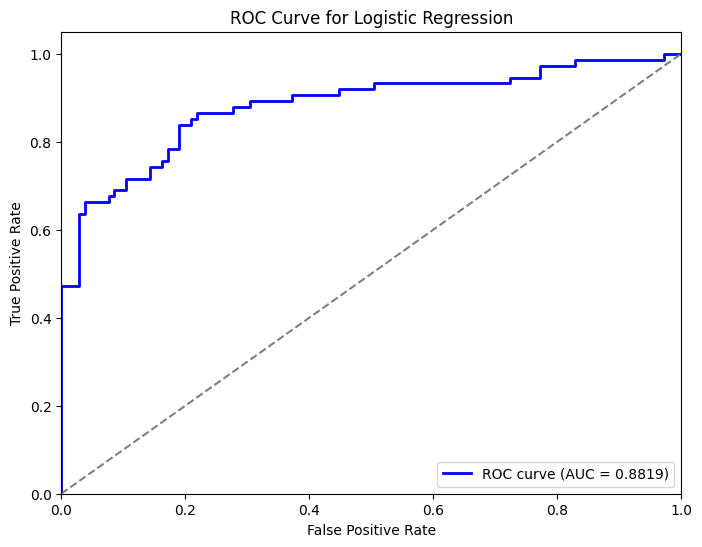

Logistic Regression метрики:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639




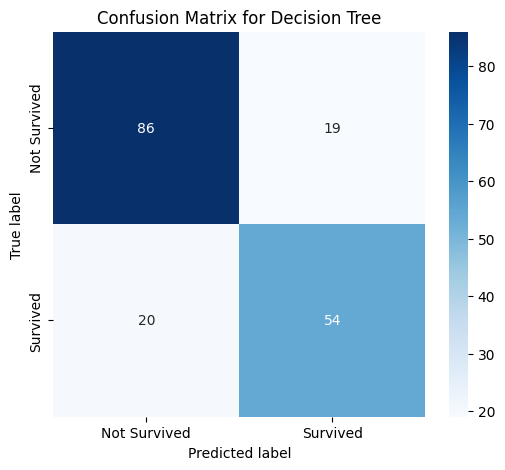

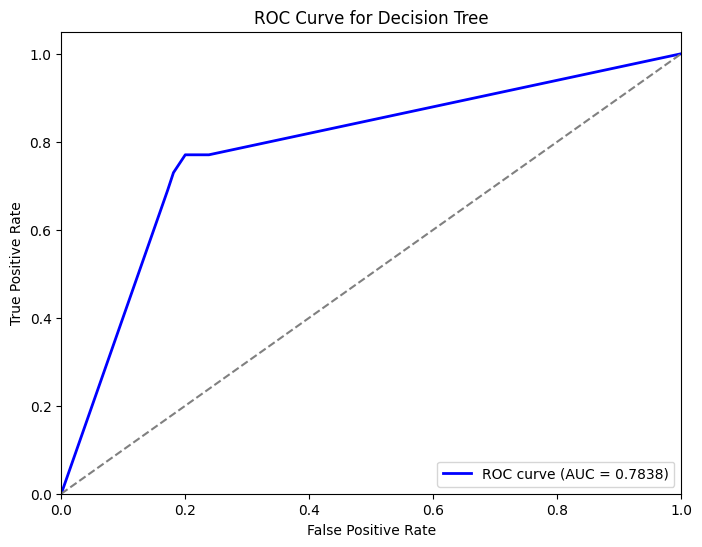

Decision Tree метрики:
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347




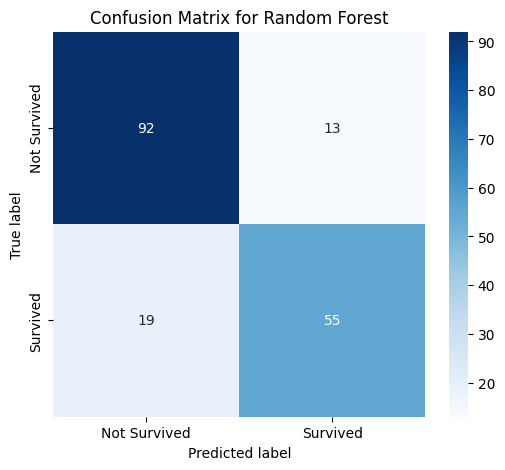

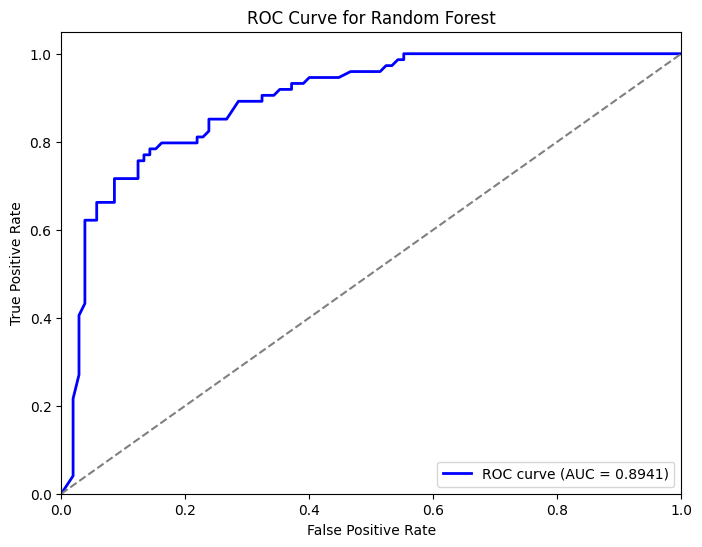

Random Forest метрики:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746


Підсумкові результати для всіх моделей:
Logistic Regression: {'Accuracy': 0.8100558659217877, 'Precision': np.float64(0.7857142857142857), 'Recall': np.float64(0.7432432432432432), 'F1 Score': np.float64(0.7638888888888888)}
Decision Tree: {'Accuracy': 0.7821229050279329, 'Precision': np.float64(0.7397260273972602), 'Recall': np.float64(0.7297297297297297), 'F1 Score': np.float64(0.7346938775510204)}
Random Forest: {'Accuracy': 0.8212290502793296, 'Precision': np.float64(0.8088235294117647), 'Recall': np.float64(0.7432432432432432), 'F1 Score': np.float64(0.7746478873239436)}


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Завантаження даних
data = pd.read_csv('train.csv')

# Попереднє опрацювання даних
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Заповнення пропусків у віці середнім значенням
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заповнення пропусків в Embarked модою
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  # One-Hot Encoding для Sex і Embarked
data['FamilySize'] = data['SibSp'] + data['Parch']  # Додавання FamilySize

# Вибір ознак (X) та цільової змінної (y)
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # Видаляємо непотрібні стовпці
y = data['Survived']

# Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словник для збереження результатів
results = {}

# Функція для тренування, передбачення та оцінки моделі
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)  # Тренування моделі
    y_pred = model.predict(X_test)  # Передбачення на тестовій вибірці
    y_prob = model.predict_proba(X_test)[:, 1]  # Ймовірності для побудови ROC-кривої
    
    # Оцінка метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Збереження результатів
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Матриця плутанини
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # ROC-крива та AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    print(f"{model_name} метрики:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, 'Logistic Regression')

# Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
evaluate_model(tree, 'Decision Tree')

# Випадковий ліс
forest = RandomForestClassifier(random_state=42)
evaluate_model(forest, 'Random Forest')

# Підсумкові результати для всіх моделей
print("Підсумкові результати для всіх моделей:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

Оптимізація моделі

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
data = pd.read_csv('train.csv')

# Попереднє опрацювання даних
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Заповнення пропусків у віці середнім значенням
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заповнення пропусків в Embarked модою
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  # One-Hot Encoding для Sex і Embarked
data['FamilySize'] = data['SibSp'] + data['Parch']  # Додавання FamilySize

# Вибір ознак (X) та цільової змінної (y)
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # Видаляємо непотрібні стовпці
y = data['Survived']

# Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Дерево рішень
tree = DecisionTreeClassifier(random_state=42)

# Крос-валідація для Логістичної регресії
print("Крос-валідація для Логістичної регресії:")
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Середня точність: {log_reg_cv.mean():.4f}")
print("\n")

# Крос-валідація для Дерева рішень
print("Крос-валідація для Дерева рішень:")
tree_cv = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"Середня точність: {tree_cv.mean():.4f}")
print("\n")

# Оптимізація гіперпараметрів для Випадкового лісу за допомогою GridSearchCV

# Параметри для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Створення моделі Випадкового лісу
rf = RandomForestClassifier(random_state=42)

# Виконання GridSearchCV для оптимізації гіперпараметрів
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Найкращі гіперпараметри для Випадкового лісу:")
print(grid_search.best_params_)
print("\n")

# Тренування моделі з оптимізованими гіперпараметрами
best_rf = grid_search.best_estimator_

# Оцінка моделі з оптимізованими гіперпараметрами
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Оцінка результатів для Випадкового лісу
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Точність: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Крос-валідація для Логістичної регресії:
Середня точність: 0.7907


Крос-валідація для Дерева рішень:
Середня точність: 0.7458


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Найкращі гіперпараметри для Випадкового лісу:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Точність: 0.8268
Precision: 0.8525
Recall: 0.7027
F1 Score: 0.7704


Порівняння моделей

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Порівняння моделей за метриками:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.810056   0.785714  0.743243  0.763889
Decision Tree        0.782123   0.739726  0.729730  0.734694
Random Forest        0.826816   0.852459  0.702703  0.770370


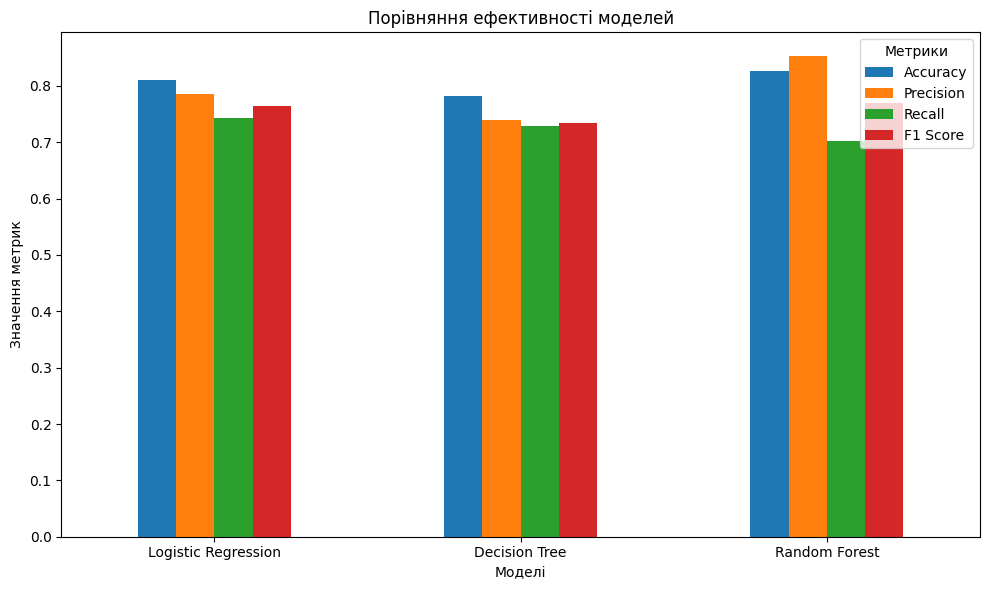

Найкраща модель за F1-Score: Random Forest з F1 Score = 0.7704


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('train.csv')

# Попереднє опрацювання даних
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Заповнення пропусків у віці середнім значенням
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заповнення пропусків в Embarked модою
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  # One-Hot Encoding для Sex і Embarked
data['FamilySize'] = data['SibSp'] + data['Parch']  # Додавання FamilySize

# Вибір ознак (X) та цільової змінної (y)
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # Видаляємо непотрібні стовпці
y = data['Survived']

# Поділ на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Оптимізація гіперпараметрів для Випадкового лісу за допомогою GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Оцінка метрик для кожної моделі
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree,
    'Random Forest': best_rf
}

metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Підсумкова таблиця метрик для порівняння моделей
metrics_df = pd.DataFrame(metrics).T
print("Порівняння моделей за метриками:")
print(metrics_df)

# Візуалізація порівняння метрик
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Порівняння ефективності моделей')
plt.ylabel('Значення метрик')
plt.xlabel('Моделі')
plt.xticks(rotation=0)
plt.legend(title='Метрики')
plt.tight_layout()
plt.show()

# Визначення найкращої моделі
best_model = max(metrics_df['F1 Score'])
best_model_name = metrics_df['F1 Score'].idxmax()
print(f"Найкраща модель за F1-Score: {best_model_name} з F1 Score = {best_model:.4f}")